<h1><center>YanP_01</center></h1>


<h3 align="center">Oct 22, 2022</h3> 

0.1  Student: Yan, Puwentao (V00031753)
## 1 Problem 1

1. Derivative

### $f(x_i)=\frac{e^x_i}{\sum_{j}^n e^x_j}$

$\text{In order to calculate the gradient of the softmax function, let's compute:}$

\begin{align}
\frac{\partial f(x_i)}{∂ x_j} = \frac{\partial}{∂ x_j}f(x_i)=\frac{\partial}{∂ x_j}\left(\frac{e^x_i}{\sum_{j}^n e^x_j}\right)
\end{align}

$\text{Use quotient rule:}$

\begin{align}
&g(x) = e^x_i\\
&h(x) = \sum_{j}^n e^x_j
\end{align} \\

$Case: i=j$

\begin{align}
\frac{\partial}{∂ x_j}\left(\frac{e^x_i}{\sum_{j}^n e^x_j}\right) &=
\frac{e^x_i\sum_{j}^n e^x_j-e^x_je^x_i}{\left(\sum_{j}^n e^x_j\right)^2}\\
&= \frac{e^x_i\left(\sum_{j}^n e^x_j-e^x_j\right)}{\left(\sum_{j}^n e^x_j\right) \left(\sum_{j}^n e^x_j\right)}\\
&=\frac{e^x_i}{\sum_{j}^n e^x_j}\times\frac{\sum_{j}^n e^x_j-e^x_j}{\sum_{j}^n e^x_j}\\
&= f(x_i)\left(1-f(x_j)\right)
\end{align}

$Case: i \ne j$

\begin{align}
\frac{\partial}{∂ x_j}\left(\frac{e^x_i}{\sum_{j}^n e^x_j}\right) &=
\frac{0-e^x_je^x_i}{\left(\sum_{j}^n e^x_j\right)^2}\\
&=-\frac{e^x_j}{\sum_{j}^n e^x_j}\frac{e^x_i}{\sum_{j}^n e^x_j}\\
&=-f(x_j)f(x_i)
\end{align}

$Hence:$

\begin{align}
\frac{\partial f(x_i)}{∂ x_j} = \left\{
\begin{array}{cl}
f(x_i)\left(1-f(x_j)\right) & i=j \\
-f(x_j)f(x_i) & i \ne j
\end{array}
\right.
\end{align}

In [4]:
# installing basic python3 library
!pip freeze
!pip3 install numpy
!pip3 install matplotlib
!pip3 install tensorflow
!pip3 install seaborn
!pip3 install sklearn
!pip3 install keras

absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.2.0
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.9
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.8
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.3
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
debugpy==1.0.0
decorator==4.4.

In [5]:
import numpy as np
import warnings
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score,StratifiedKFold
import seaborn as sns
from collections import Counter

2. Simple

In [6]:
#suppress warnings
warnings.filterwarnings('ignore')

# This algorithm is inspired by https://www.youtube.com/watch?v=w8yWXqWQYmU
def init_param(n_r, n_c):
  # n_r(row #): number of nodes in the hidden layer, n_c(column #): number of weights
  W = np.random.rand(n_r, n_c)-0.5 # np.random.rand() generate number between [0,1], so we -0.5 to make sure W1 has negative weight.
  return W

def sigmoid(y_hat):
  return 1/(1+np.exp(-y_hat))

def deriv_sig(y_hat):
  return sigmoid(y_hat)*(1-sigmoid(y_hat))

def relu(y_hat): # inspired by https://www.digitalocean.com/community/tutorials/relu-function-in-python
  # When input value <= 0, return 0. When input value > 0, return input value.
  return np.maximum(y_hat, 0)

def deriv_relu(y_hat):
  return (y_hat > 0)

def softmax(y_hat_out):
  return np.exp(y_hat_out)/sum(np.exp(y_hat_out))

def forward_prop(W1, W2, X, act_func):
  # input layer
  X = X.T # X.shape = (784, 60000) every column is an input training set

  # hidden layer
  y_hat1 = W1.dot(X) # (128, 60000)
  if (act_func == "sigmoid"):
    H1 = sigmoid(y_hat1) # every column is a hidden layer for the corresponding column(training set) in X.
  else:
    H1 = relu(y_hat1)
  
  # output layer
  y_hat_out = W2.dot(H1) # (10, 60000)
  out_matrix = softmax(y_hat_out) # output matrix
  return y_hat1, H1, y_hat_out, out_matrix

def backward_prop(y_hat1, H1, out_matrix, W1, W2, X, l_rate, act_func):
  n = 60000
  # transform train_y (60000,) to categorical martix (10, 60000).
  Y = np.zeros((10, 60000), dtype=int)
  for i in range(Y.shape[1]):
    Y[:,i][train_y[i]] = 1

  # update W2
  error2 = out_matrix - Y # (10, 60000)
  dW2 = (error2.dot(H1.T))/n
  W2 = W2 - l_rate * dW2

  # update W1
  if (act_func == "sigmoid"):
    error1 = W2.T.dot(error2) * deriv_sig(y_hat1) # (128, 60000)
  else:
    error1 = W2.T.dot(error2) * deriv_relu(y_hat1)
    
  dW1 = (error1.dot(X))/n
  W1 = W1 - l_rate * dW1

  return W1, W2

def transformX(X1):
  X = np.zeros((60000, 784), dtype=int)
  for i in range(X1.shape[0]):
    X[i] = X1[i].flatten()
  return X

def predict(W1, W2, X, act_func):
  _, _, _, out_matrix = forward_prop(W1, W2, X, act_func)
  return out_matrix

def get_accuracy(pred_matrix, y):
  predictions = np.argmax(pred_matrix, 0)
  return np.sum(predictions == y) / y.size

def simple_NN(train_X, train_y, l_rate, n_iterations, act_func):
  if(act_func != "sigmoid"):
    train_X = train_X / 255

  # Accuracy list for plot
  accu_list = []

  # initiate weights with random number between 0-1
  np.random.seed(1337)
  W1 = init_param(128, 784) # 128 nodes and each node corresponds to 784 weights
  W2 = init_param(10, 128)

  # Transform every sample's dimemsion in train_X from 28*28 to 784*1. (i.e. from (60000, 28, 28) to (60000, 784))
  X = transformX(train_X)

  # perceptron algorithm
  for i in range(n_iterations):
    # forward propagation
    y_hat1, H1, y_hat_out, out_matrix = forward_prop(W1, W2, X, act_func)

    if i % 2 == 0:
      pred_matrix = predict(W1, W2, X, act_func)
      accu_list.append(get_accuracy(pred_matrix, train_y))

    # backward propagation
    W1, W2 = backward_prop(y_hat1, H1, out_matrix, W1, W2, X, l_rate, act_func)
  plt.plot(accu_list)
  plt.show()
  print("Complete!")
  return

# create a list that will contain misclassified images' index
misclass_list = []

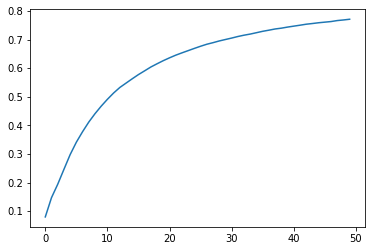

Complete!
CPU times: user 3min 58s, sys: 41.5 s, total: 4min 40s
Wall time: 2min 54s


In [7]:
%%time
# load data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

simple_NN(train_X, train_y, 0.2, 100, "sigmoid")

From the plot, we observe the network’s accuracy keep raising.

3. Keras

In [8]:
# load data
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# convert train_X and test_X elements' shape from 28*28 to 784*1
train_X = train_X.reshape(60000, 784)
test_X = test_X.reshape(10000, 784)
# convert train_y and test_y elements from integer to categorical representation
train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

Epoch 1/18
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0256 - accuracy: 0.8455 - val_loss: 0.0146 - val_accuracy: 0.9135
Epoch 2/18
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0177 - accuracy: 0.8906 - val_loss: 0.0137 - val_accuracy: 0.9173
Epoch 3/18
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0162 - accuracy: 0.8961 - val_loss: 0.0126 - val_accuracy: 0.9207
Epoch 4/18
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0149 - accuracy: 0.9024 - val_loss: 0.0117 - val_accuracy: 0.9260
Epoch 5/18
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0141 - accuracy: 0.9090 - val_loss: 0.0109 - val_accuracy: 0.9298
Epoch 6/18
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0138 - accuracy: 0.9100 - val_loss: 0.0109 - val_accuracy: 0.9263
Epoch 7/18
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0137 - accuracy: 0.9107 - val_loss: 0.0107 - val_accuracy:

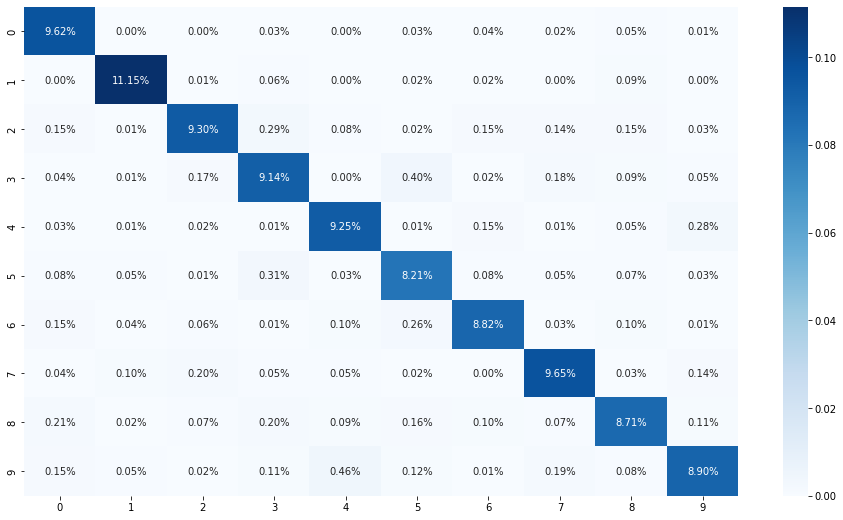

In [9]:
%%time
# inspired by https://keras.io/examples/vision/mnist_convnet/#build-the-model
model = keras.Sequential(
    [
        keras.Input(shape=(784,)), # input layer
        layers.Dense(128, activation= 'sigmoid'), # one hidden layer
        layers.Dense(10, activation="softmax"), # output layer
    ]
)

# compiling the sequential model
# For optimizer, use "adam" since it's a Gradient Descent algorithm
# Use "MeanSquaredError" for loss function.
model.compile(loss="MeanSquaredError", optimizer="adam", metrics=["accuracy"]) 
model.fit(train_X, train_y, epochs=18, validation_split=0.1)

# obtain Test loss and Test accuracy
score = model.evaluate(test_X, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
# create confusion matrix of training and test errors
predicts = model.predict(test_X)
test_y = np.argmax(test_y.T, 0)
predicts = np.argmax(predicts.T, 0)
confusion_matr = confusion_matrix(test_y, predicts)
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr/np.sum(confusion_matr), fmt='.2%', cmap="Blues", annot=True);
plt.savefig("conf matrix")

# obtain miss
result = np.absolute(test_y - predicts)
misclass_list.extend(np.nonzero(result)[0].tolist())

Summary:  

Using Keras is much faster(1min 27s) and much more accurate than my simple ANN.

4. ReLU

In [10]:
# load data
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# convert train_X and test_X elements' shape from 28*28 to 784*1
train_X = train_X.reshape(60000, 784)
train_X = train_X.astype("float32") / 255
test_X = test_X.reshape(10000, 784)
test_X = test_X.astype("float32") / 255
# convert train_y and test_y elements from integer to categorical representation
train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

Epoch 1/18
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0128 - accuracy: 0.9176 - val_loss: 0.0057 - val_accuracy: 0.9647
Epoch 2/18
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0062 - accuracy: 0.9608 - val_loss: 0.0047 - val_accuracy: 0.9683
Epoch 3/18
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0044 - accuracy: 0.9726 - val_loss: 0.0043 - val_accuracy: 0.9727
Epoch 4/18
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0036 - accuracy: 0.9778 - val_loss: 0.0038 - val_accuracy: 0.9737
Epoch 5/18
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0029 - accuracy: 0.9821 - val_loss: 0.0035 - val_accuracy: 0.9773
Epoch 6/18
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0024 - accuracy: 0.9850 - val_loss: 0.0033 - val_accuracy: 0.9800
Epoch 7/18
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0020 - accuracy: 0.9881 - val_loss: 0.0035 - val_accuracy:

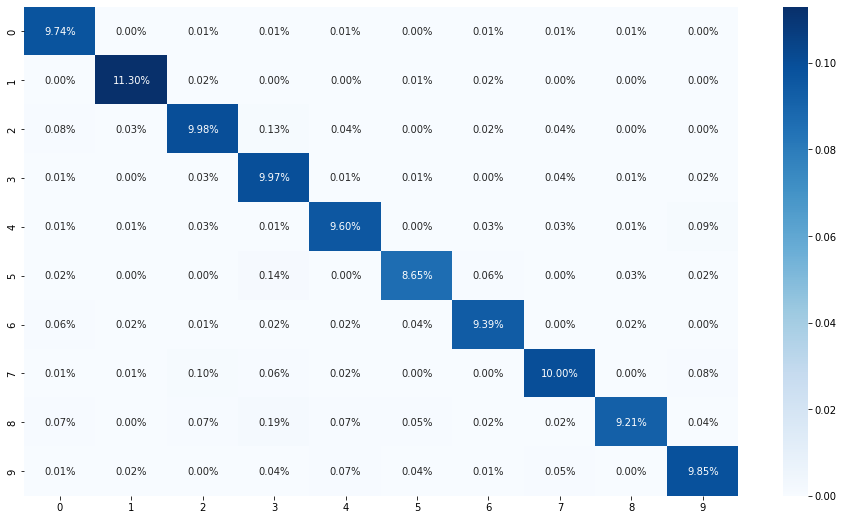

In [11]:
%%time
# keras with Relu
model = keras.Sequential(
    [
        keras.Input(shape=(784,)), # input layer
        layers.Dense(128, activation= 'relu'), # one hidden layer
        layers.Dense(10, activation="softmax"), # output layer
    ]
)

model.compile(loss="MeanSquaredError", optimizer="adam", metrics=["accuracy"])
model.fit(train_X, train_y, epochs=18, validation_split=0.1)

# obtain Test loss and Test accuracy
score = model.evaluate(test_X, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
# create confusion matrix of training and test errors
predicts = model.predict(test_X)
test_y = np.argmax(test_y.T, 0)
predicts = np.argmax(predicts.T, 0)
confusion_matr = confusion_matrix(test_y, predicts)
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr/np.sum(confusion_matr), fmt='.2%', cmap="Blues", annot=True);
plt.savefig("conf matrix")

# obtain miss
result = np.absolute(test_y - predicts)
misclass_list.extend(np.nonzero(result)[0].tolist())

Summary: 

1. The Neural networks using Relu or Sigmoid activation functions took similar time.

2. Relu activation function has higher accuracy than the sigmoid activation function.

5. Dropout

In [12]:
# load data
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# convert train_X and test_X elements' shape from 28*28 to 784*1
train_X = train_X.reshape(60000, 784)
train_X = train_X.astype("float32") / 255
test_X = test_X.reshape(10000, 784)
test_X = test_X.astype("float32") / 255
# convert train_y and test_y elements from integer to categorical representation
train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

Epoch 1/18
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1116 - accuracy: 0.5234 - val_loss: 0.0548 - val_accuracy: 0.8158
Epoch 2/18
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0660 - accuracy: 0.7143 - val_loss: 0.0470 - val_accuracy: 0.8800
Epoch 3/18
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0634 - accuracy: 0.7379 - val_loss: 0.0455 - val_accuracy: 0.8858
Epoch 4/18
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0619 - accuracy: 0.7461 - val_loss: 0.0482 - val_accuracy: 0.8622
Epoch 5/18
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0605 - accuracy: 0.7571 - val_loss: 0.0430 - val_accuracy: 0.8892
Epoch 6/18
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0601 - accuracy: 0.7587 - val_loss: 0.0451 - val_accuracy: 0.8698
Epoch 7/18
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0597 - accuracy: 0.7604 - val_loss: 0.0405 - val_accuracy:

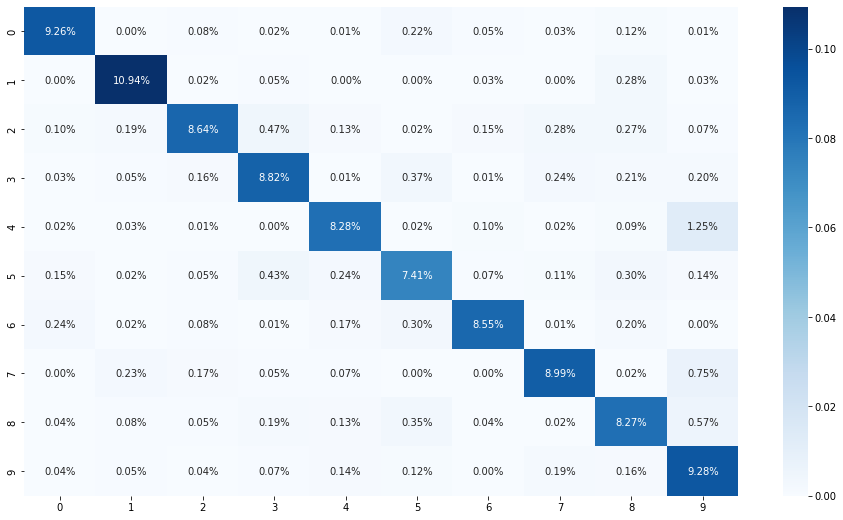

In [13]:
%%time
model = keras.Sequential(
    [
      keras.Input(shape=(784,)), # input layer
      layers.Dense(128, activation= 'relu', kernel_regularizer=regularizers.L2(0.01)), # first hidden layer
      layers.Dropout(0.5),
      layers.Dense(128, activation= 'relu', kernel_regularizer=regularizers.L2(0.001)), # second hidden layer
      layers.Dropout(0.5),
      layers.Dense(128, activation= 'relu', kernel_regularizer=regularizers.L2(0.0001)), # third hidden layer
      layers.Dropout(0.5),
      layers.Dense(10, activation="softmax"), # output layer
    ]
)
model.compile(loss="MeanSquaredError", optimizer="adam", metrics=["accuracy"])
# train model
model.fit(train_X, train_y, epochs=18, validation_split=0.1)
# obtain Test loss and Test accuracy
score = model.evaluate(test_X, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
# create confusion matrix of training and test errors
predicts = model.predict(test_X)
test_y = np.argmax(test_y.T, 0)
predicts = np.argmax(predicts.T, 0)
confusion_matr = confusion_matrix(test_y, predicts)
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr/np.sum(confusion_matr), fmt='.2%', cmap="Blues", annot=True);
plt.savefig("conf matrix")

# obtain miss
result = np.absolute(test_y - predicts)
misclass_list.extend(np.nonzero(result)[0].tolist())

Summary:

I am not sure how to use cross-validation to select the best regularization and dropout hyperparameters, so my model has lower accuracy within 18 epochs, but it doesn't have problem with overfitting since we used L2 regularization and dropout techniques.

6.Convolution

In [14]:
# load data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X.astype("float32") / 255
train_X = np.expand_dims(train_X, -1)
test_X = test_X.astype("float32") / 255
test_X = np.expand_dims(test_X, -1)
# convert train_y and test_y elements from integer to categorical representation
train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

Epoch 1/18
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0076 - accuracy: 0.9492 - val_loss: 0.0027 - val_accuracy: 0.9815
Epoch 2/18
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0028 - accuracy: 0.9822 - val_loss: 0.0022 - val_accuracy: 0.9872
Epoch 3/18
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0019 - accuracy: 0.9886 - val_loss: 0.0022 - val_accuracy: 0.9868
Epoch 4/18
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0014 - accuracy: 0.9915 - val_loss: 0.0017 - val_accuracy: 0.9885
Epoch 5/18
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0011 - accuracy: 0.9934 - val_loss: 0.0021 - val_accuracy: 0.9862
Epoch 6/18
1688/1688 [==============================] - 24s 14ms/step - loss: 8.8587e-04 - accuracy: 0.9945 - val_loss: 0.0021 - val_accuracy: 0.9865
Epoch 7/18
1688/1688 [==============================] - 24s 14ms/step - loss: 6.9064e-04 - accuracy: 0.9959 - val_loss: 

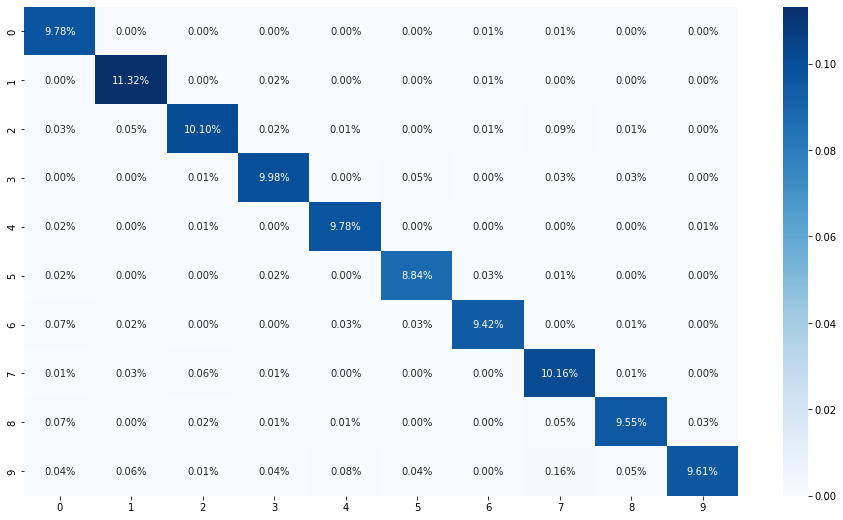

In [15]:
%%time
model = keras.Sequential(
    [
      keras.Input(shape=(28,28,1)), # input layer
      layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # convolutional layer: use filters = 32 to make the model faster and kernel_size=(3, 3) is the optimal choice
      layers.MaxPooling2D(pool_size=(2, 2)), # pooling layer
      layers.Flatten(),
      layers.Dense(128, activation= 'relu'), # fully connected layer
      layers.Dense(10, activation="softmax"), # output layer
    ]
)
model.compile(loss="MeanSquaredError", optimizer="adam", metrics=["accuracy"])
model.fit(train_X, train_y, epochs=18, validation_split=0.1)

# obtain Test loss and Test accuracy
score = model.evaluate(test_X, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
# create confusion matrix of training and test errors
predicts = model.predict(test_X)
test_y = np.argmax(test_y.T, 0)
predicts = np.argmax(predicts.T, 0)
confusion_matr = confusion_matrix(test_y, predicts)
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr/np.sum(confusion_matr), fmt='.2%', cmap="Blues", annot=True);
plt.savefig("conf matrix")

# obtain miss
result = np.absolute(test_y - predicts)
misclass_list.extend(np.nonzero(result)[0].tolist())

Summary:

The CNN has the highest accuracy compared with all of the above models.

7.Mugshots

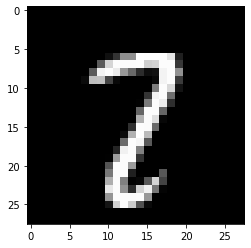

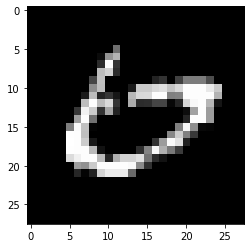

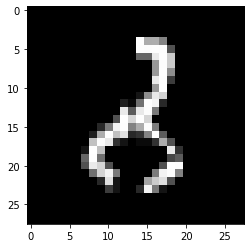

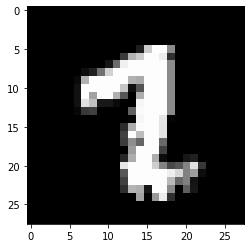

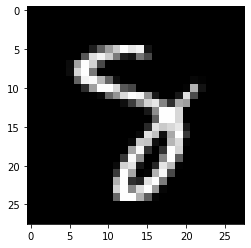

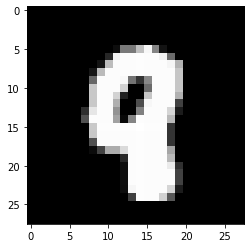

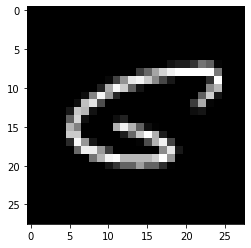

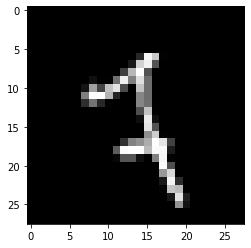

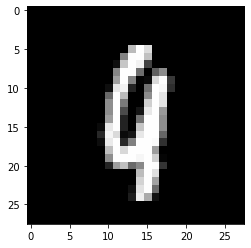

In [16]:
misclass_dict = Counter(misclass_list)
misclass_list = sorted(misclass_dict, key=misclass_dict.get, reverse=True)[:9]
test_X = test_X.reshape(10000, 28, 28)
for i in misclass_list:
  plt.imshow(test_X[i], cmap='gray')
  plt.show()

I can classify most of those images myself because I've seen similiar hand writtens. Some of the images are hard to decide because they look very similiar to multiple numbers.

8.Bonus

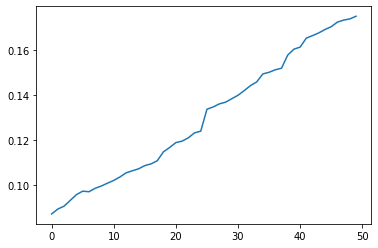

Complete!
CPU times: user 3min 1s, sys: 26.6 s, total: 3min 28s
Wall time: 1min 46s


In [17]:
%%time
# load data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

simple_NN(train_X, train_y, 0.2, 100, "relu")

Summary:

Relu(3min 28s) is more computationally efficient to compute than Sigmoid(4min 40s).

I couldn't compare the accuracy because relu requires more iterations to get higher accuracy, and I used 100 iterations to avoid long computation times.